In [1]:
# import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv('hepsiemlak_cleaned.csv')

In [3]:
# see the information of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          5743 non-null   object
 1   district      5743 non-null   object
 2   neighborhood  5743 non-null   object
 3   room          5743 non-null   int64 
 4   salon         5743 non-null   int64 
 5   area          5743 non-null   int64 
 6   age           5743 non-null   int64 
 7   floor         5743 non-null   int64 
 8   price         5743 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 403.9+ KB
None


In [4]:
# fix the column types
data['city'] = data['city'].astype('category')
data['district'] = data['district'].astype('category')
data['neighborhood'] = data['neighborhood'].astype('category')
data['room'] = data['room'].astype('int')
data['salon'] = data['salon'].astype('int')
data['area'] = data['area'].astype('int')
data['age'] = data['age'].astype('int')
data['floor'] = data['floor'].astype('int')
data['price'] = data['price'].astype('int')

In [5]:
# see the information and description of the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          5743 non-null   category
 1   district      5743 non-null   category
 2   neighborhood  5743 non-null   category
 3   room          5743 non-null   int64   
 4   salon         5743 non-null   int64   
 5   area          5743 non-null   int64   
 6   age           5743 non-null   int64   
 7   floor         5743 non-null   int64   
 8   price         5743 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 315.8 KB
None
              room   salon         area          age        floor  \
count  5743.000000  5743.0  5743.000000  5743.000000  5743.000000   
mean      2.146439     1.0   102.637646    12.776772     2.385687   
std       0.817333     0.0    37.994905    10.523330     1.559273   
min       1.000000     1.0     5.000000     0.000000    -2.000000   
25%    

array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'salon'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

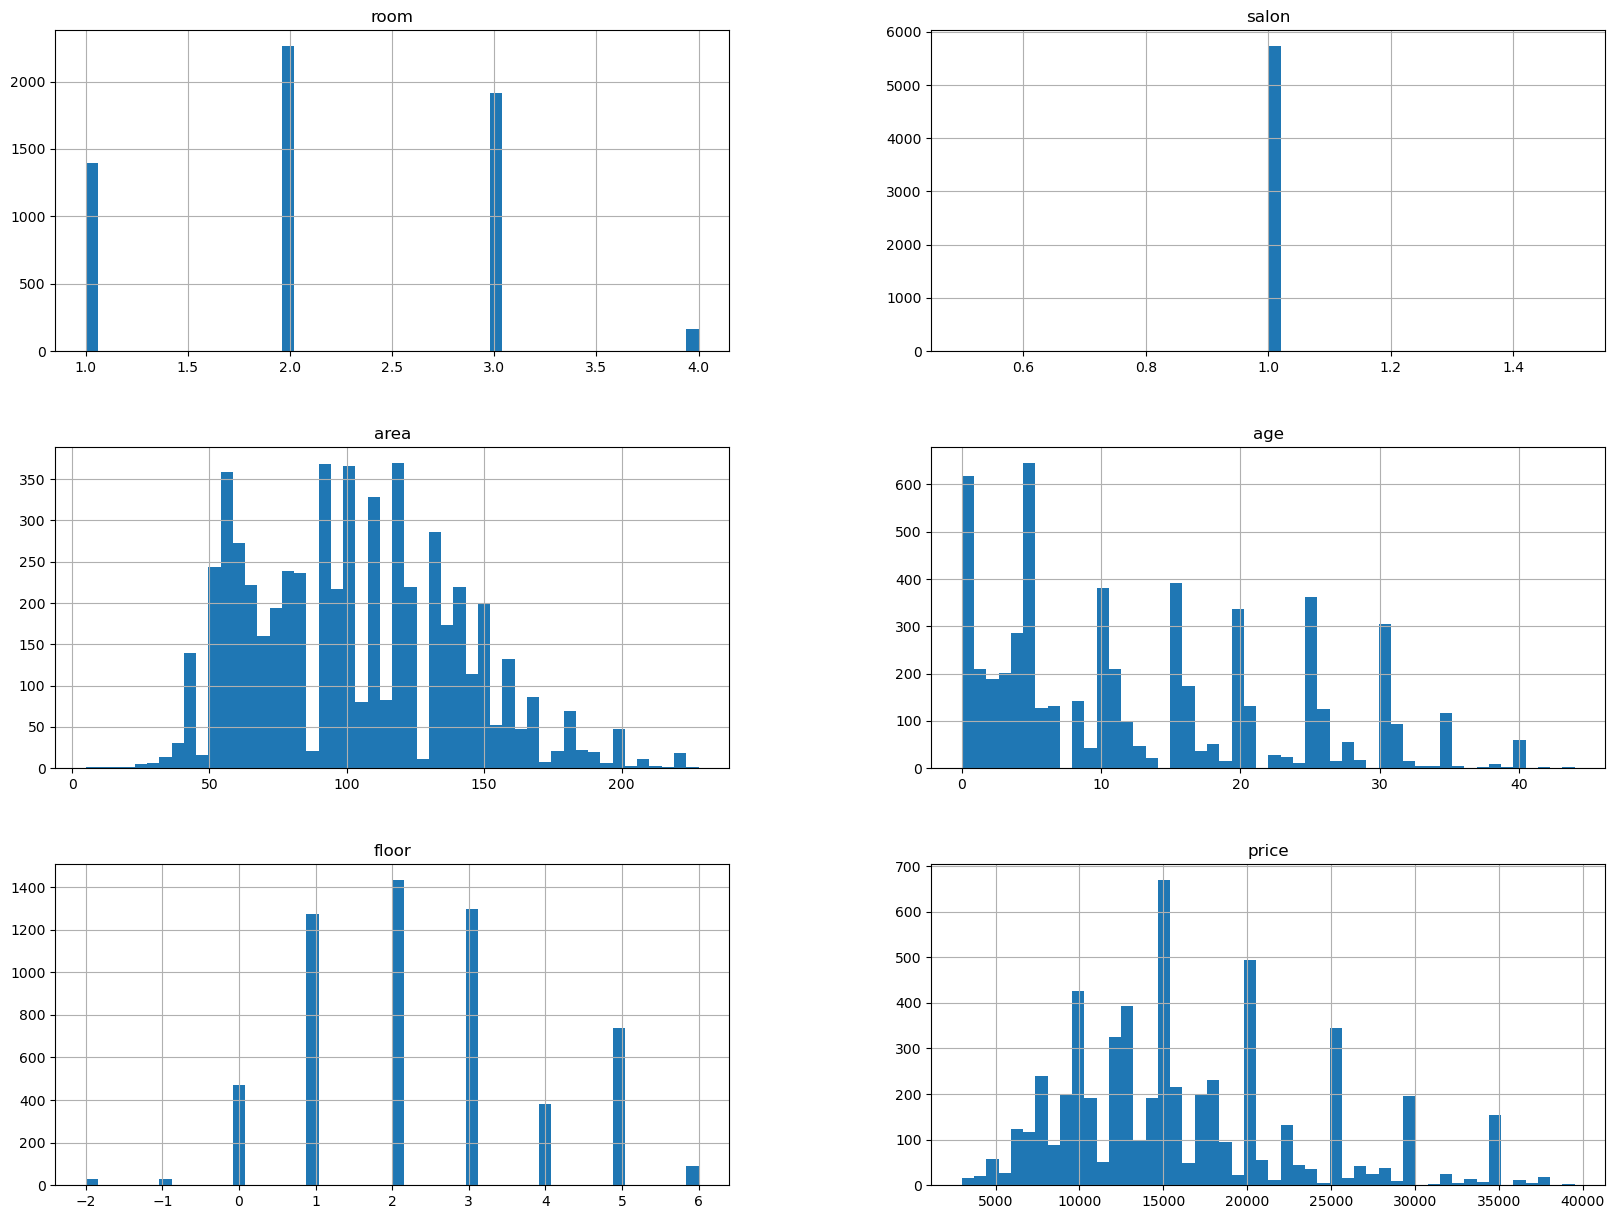

In [6]:
# see the histogram of the data
data.hist(bins=50, figsize=(20,15))

In [15]:
# import the packages for the machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [16]:
# split the data into train and test
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
# create the pipeline for the numerical attributes
numerical_features = ['room', 'salon', 'area', 'age', 'floor']

In [18]:
# create the pipeline for the categorical attributes
categorical_features = ['city', 'district', 'neighborhood']

In [19]:
# create the full pipeline
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [20]:
# prepare the data
X_train = full_pipeline.fit_transform(train_set)
y_train = train_set['price']

In [21]:
# train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
# evaluate the model
X_test = full_pipeline.transform(test_set)
y_test = test_set['price']
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE:', lin_rmse)
# calculate the r2 score
r2 = r2_score(y_test, y_pred)
print('Linear Regression R2:', r2)

ValueError: Found unknown categories ['soma', 'kavaklidere'] in column 1 during transform